In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44,20,24,71,22,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44,4,22,44,25,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46,19,26,38,30,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24,11,9,45,16,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41,7,20,82,33,1010.8,1006.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   WindGustSpeed  145460 non-null  int64  
 4   WindSpeed9am   145460 non-null  int64  
 5   WindSpeed3pm   145460 non-null  int64  
 6   Humidity9am    145460 non-null  int64  
 7   Humidity3pm    145460 non-null  int64  
 8   Pressure9am    145460 non-null  float64
 9   Pressure3pm    145460 non-null  float64
 10  Temp9am        145460 non-null  float64
 11  Temp3pm        145460 non-null  float64
 12  RainToday      145460 non-null  object 
 13  RainTomorrow   145460 non-null  object 
dtypes: float64(7), int64(5), object(2)
memory usage: 15.5+ MB


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.069546,23.020041,2.307990,37.210525,13.872831,18.269799,67.624062,49.942204,912.253980,910.366122,16.784235,21.145405
std,6.482693,7.407808,8.389771,16.649265,8.993610,9.119006,20.987869,22.334356,310.151281,309.084382,6.712427,7.635396
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.800000,0.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1010.900000,1008.400000,12.100000,16.200000
50%,11.900000,22.500000,0.000000,37.000000,13.000000,17.000000,69.000000,51.000000,1016.600000,1014.200000,16.600000,20.900000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


In [6]:
df_new = df.copy()
df_new['RainToday'] = df_new['RainToday'].map({'Yes':1 ,'No':0})
df_new['RainTomorrow'] = df_new['RainTomorrow'].map({'Yes':1 ,'No':0})

In [7]:
df_new.dropna(inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
X = df_new.drop('RainTomorrow',axis=1)
y = df_new['RainTomorrow']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(max_depth=10)
Dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [55]:
pred = Dtree.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     32820
         1.0       0.70      0.48      0.57      9417

    accuracy                           0.84     42237
   macro avg       0.78      0.71      0.73     42237
weighted avg       0.83      0.84      0.83     42237



In [58]:
print(confusion_matrix(y_test,pred))

[[30860  1960]
 [ 4903  4514]]


In [15]:
from sklearn import tree 
text_representation = tree.export_text(Dtree)
print(text_representation)

|--- feature_7 <= 71.50
|   |--- feature_2 <= 0.65
|   |   |--- feature_7 <= 53.50
|   |   |   |--- feature_3 <= 56.50
|   |   |   |   |--- feature_9 <= 1011.65
|   |   |   |   |   |--- feature_7 <= 41.50
|   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= 0.30
|   |   |   |   |   |   |   |   |--- feature_6 <= 75.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 49.00
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 8.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  8.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |--- feature_3 >  49.00
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 69.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  69.50
|   |   |   |   |   |   |   |   | 

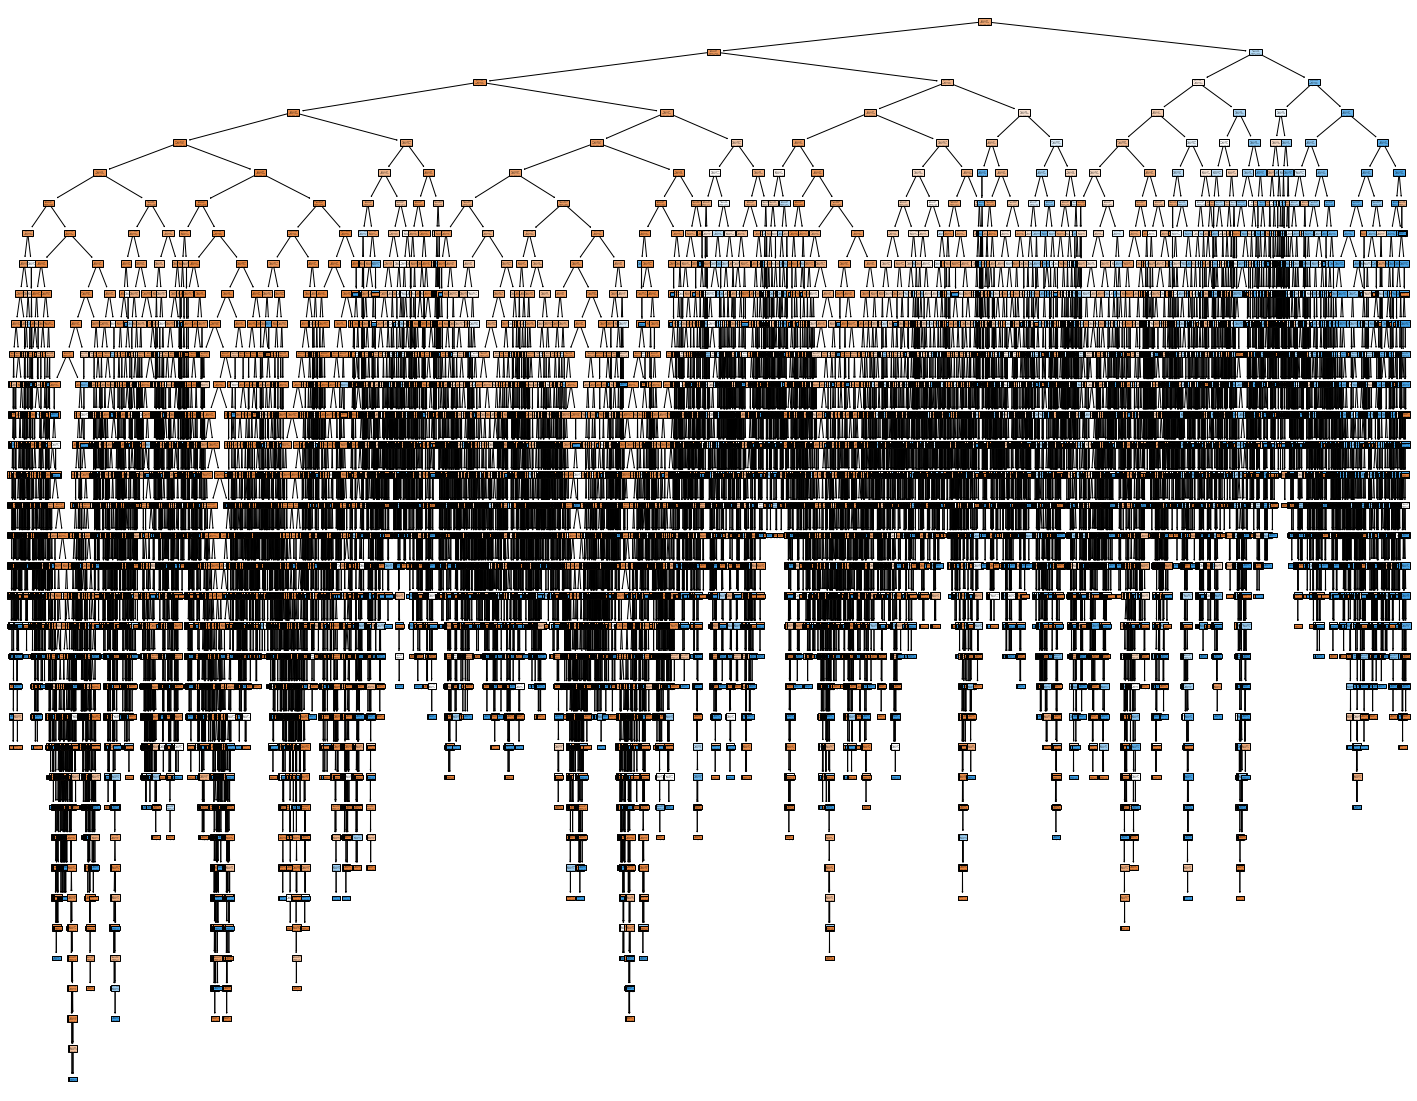

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Dtree,
                   filled=True)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(n_estimators=200)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [66]:
rfc_pred = rfc.predict(X_test)

In [67]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     32820
         1.0       0.75      0.49      0.59      9417

    accuracy                           0.85     42237
   macro avg       0.81      0.72      0.75     42237
weighted avg       0.84      0.85      0.84     42237



In [68]:
print(confusion_matrix(y_test,rfc_pred))

[[31302  1518]
 [ 4819  4598]]
